Notebook for graphing results from our tests

Cloud Computing Final Project
Spring 2020
Julian White, Darian Low, Yidong Hu

In [50]:
# Plotting average bandwidth for fattree topologies with fanouts of 2, 3, 4, and 5 
import os, os.path
%matplotlib inline
import matplotlib.pyplot as plt

In [51]:
def graph_fanouts(fanout_list):
    
    BW = 0.0
    fanout_avg_BW = []


    for fanout in fanout_list:
        fanout_total = 0
        fanout_count = 0   

        logs = [name for name in os.listdir(DIR + fanout) if os.path.isfile(os.path.join(DIR + fanout, name))]  
        for log in logs:
            with open(DIR + fanout + "/" + log) as file:
                lines = file.readlines()
                log_total_BW = 0
                last_BW = 0
                BW = 0
                count = 0
                data_start = False
                for line in lines:
                    # find start of data
                    if "Interval" in line:
                        data_start = True
                        continue

                    # take BW from data
                    if data_start == True:
                        line_split = line.split("  ")
                        BW_score = line_split[-1]
                        BW_split = BW_score.split(" ")
                        BW = float(BW_split[-2])

                        if "Gbits" in BW_split[-1]:
                            BW *= 1000

                        last_BW = BW
                        log_total_BW += last_BW
                        count+=1

                log_total_BW -= last_BW
                if count > 0:
                    fanout_total += log_total_BW
                    fanout_count += count
                    
        if fanout_count == 0:
            fanout_total = 0
            fanout_count = 1

        fanout_avg_BW.append(fanout_total/ fanout_count)
        
    return fanout_avg_BW

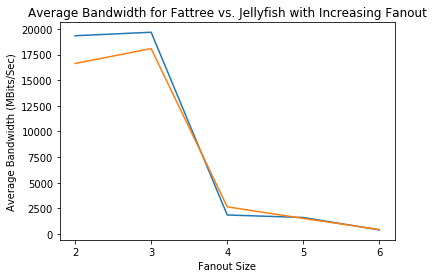

In [63]:
# Fattree vs. Jellyfish for Increasing Fanouts

DIR = '../fattree-logs/randIperf/'
fanouts = [2, 3, 4, 5, 6]
fanout_list = ["fanout-2","fanout-3", "fanout-4", "fanout-5", "fanout-6"]

BW = 0.0
fanout_avg_BW = []   
fanout_avg_BW = graph_fanouts(fanout_list)

plt.plot(fanouts,fanout_avg_BW)

DIR = '../jellyfish-logs/randIperf/'
fanouts = [2, 3, 4, 5, 6]
fanout_list = ["fanout-2","fanout-3", "fanout-4", "fanout-5", "fanout-6"]
    
fanout_avg_BW = graph_fanouts(fanout_list)

plt.plot(fanouts,fanout_avg_BW)
plt.xlabel('Fanout Size')
plt.xticks(fanouts) 
plt.title('Average Bandwidth for Fattree vs. Jellyfish with Increasing Fanout')
plt.ylabel('Average Bandwidth (MBits/Sec)')
plt.show()


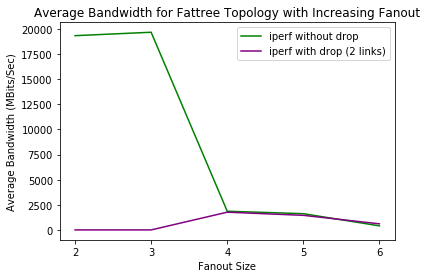

In [53]:
# Average Bandwidth for Fattree Topology with Increasing Fanout (2 dropped links)

DIR = '../fattree-logs/randIperf/'
fanouts = [2, 3, 4, 5, 6]
fanout_list = ["fanout-2", "fanout-3", "fanout-4", "fanout-5", "fanout-6"]
   
fanout_avg_BW = graph_fanouts(fanout_list)

plt.plot(fanouts,fanout_avg_BW, color='green', label='iperf without drop')

DIR = '../fattree-logs/rand2Links/'
fanouts = [2, 3, 4, 5, 6]
fanout_list = ["fanout-2","fanout-3", "fanout-4", "fanout-5", "fanout-6"]
  
fanout_avg_BW = graph_fanouts(fanout_list)

plt.plot(fanouts,fanout_avg_BW, color='purple', label='iperf with drop (2 links)')
plt.xlabel('Fanout Size')
plt.xticks(fanouts) 
plt.title('Average Bandwidth for Fattree Topology with Increasing Fanout')
plt.ylabel('Average Bandwidth (MBits/Sec)')
plt.legend()
plt.show()

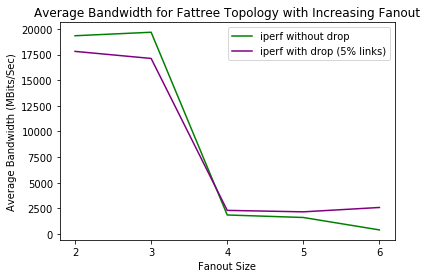

In [54]:
# Average Bandwidth for Fattree Topology with Increasing Fanout (5% dropped links)
DIR = '../fattree-logs/randIperf/'
fanouts = [2, 3, 4, 5, 6]
fanout_list = ["fanout-2", "fanout-3", "fanout-4", "fanout-5", "fanout-6"]

fanout_avg_BW = graph_fanouts(fanout_list)

plt.plot(fanouts,fanout_avg_BW, color='green', label='iperf without drop')

DIR = '../fattree-logs/rand5%/'
fanouts = [2, 3, 4, 5, 6]
fanout_list = ["fanout-2","fanout-3", "fanout-4", "fanout-5", "fanout-6"]
  
fanout_avg_BW = graph_fanouts(fanout_list)

plt.plot(fanouts,fanout_avg_BW, color='purple', label='iperf with drop (5% links)')
plt.xlabel('Fanout Size')
plt.xticks(fanouts) 
plt.title('Average Bandwidth for Fattree Topology with Increasing Fanout')
plt.ylabel('Average Bandwidth (MBits/Sec)')
plt.legend()
plt.show()

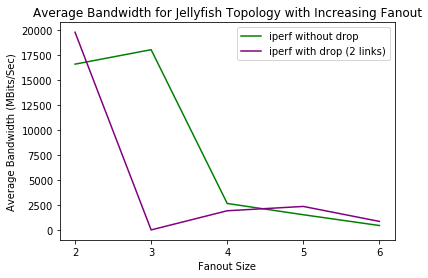

In [64]:
# Average Bandwidth for Jellyfish Topology with Increasing Fanout (2 dropped links)
import os, os.path
%matplotlib inline
import matplotlib.pyplot as plt


DIR = '../jellyfish-logs/randIperf/'
fanouts = [2, 3, 4, 5, 6]
fanout_list = ["fanout-2", "fanout-3", "fanout-4", "fanout-5", "fanout-6"]
  
fanout_avg_BW = graph_fanouts(fanout_list)

plt.plot(fanouts,fanout_avg_BW, color='green', label='iperf without drop')

DIR = '../jellyfish-logs/rand2Links/'
fanouts = [2, 3, 4, 5, 6]
fanout_list = ["fanout-2","fanout-3", "fanout-4", "fanout-5", "fanout-6"]
  
fanout_avg_BW = graph_fanouts(fanout_list)

plt.plot(fanouts,fanout_avg_BW, color='purple', label='iperf with drop (2 links)')
plt.xlabel('Fanout Size')
plt.xticks(fanouts) 
plt.title('Average Bandwidth for Jellyfish Topology with Increasing Fanout')
plt.ylabel('Average Bandwidth (MBits/Sec)')
plt.legend()
plt.show()


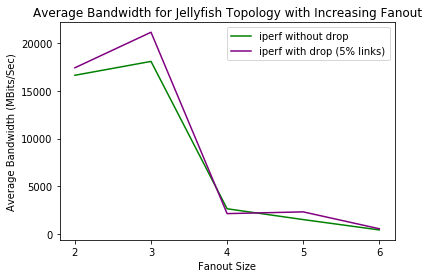

In [65]:
# Average Bandwidth for Jellyfish Topology with Increasing Fanout (5% dropped links)
import os, os.path
%matplotlib inline
import matplotlib.pyplot as plt


DIR = '../jellyfish-logs/randIperf/'
fanouts = [2, 3, 4, 5, 6]
fanout_list = ["fanout-2", "fanout-3", "fanout-4", "fanout-5", "fanout-6"]
    
fanout_avg_BW = graph_fanouts(fanout_list)

plt.plot(fanouts,fanout_avg_BW, color='green', label='iperf without drop')

DIR = '../jellyfish-logs/rand5%/'
fanouts = [2, 3, 4, 5, 6]
fanout_list = ["fanout-2","fanout-3", "fanout-4", "fanout-5", "fanout-6"]
    
fanout_avg_BW = graph_fanouts(fanout_list)

plt.plot(fanouts,fanout_avg_BW, color='purple', label='iperf with drop (5% links)')
plt.xlabel('Fanout Size')
plt.xticks(fanouts) 
plt.title('Average Bandwidth for Jellyfish Topology with Increasing Fanout')
plt.ylabel('Average Bandwidth (MBits/Sec)')
plt.legend()
plt.show()


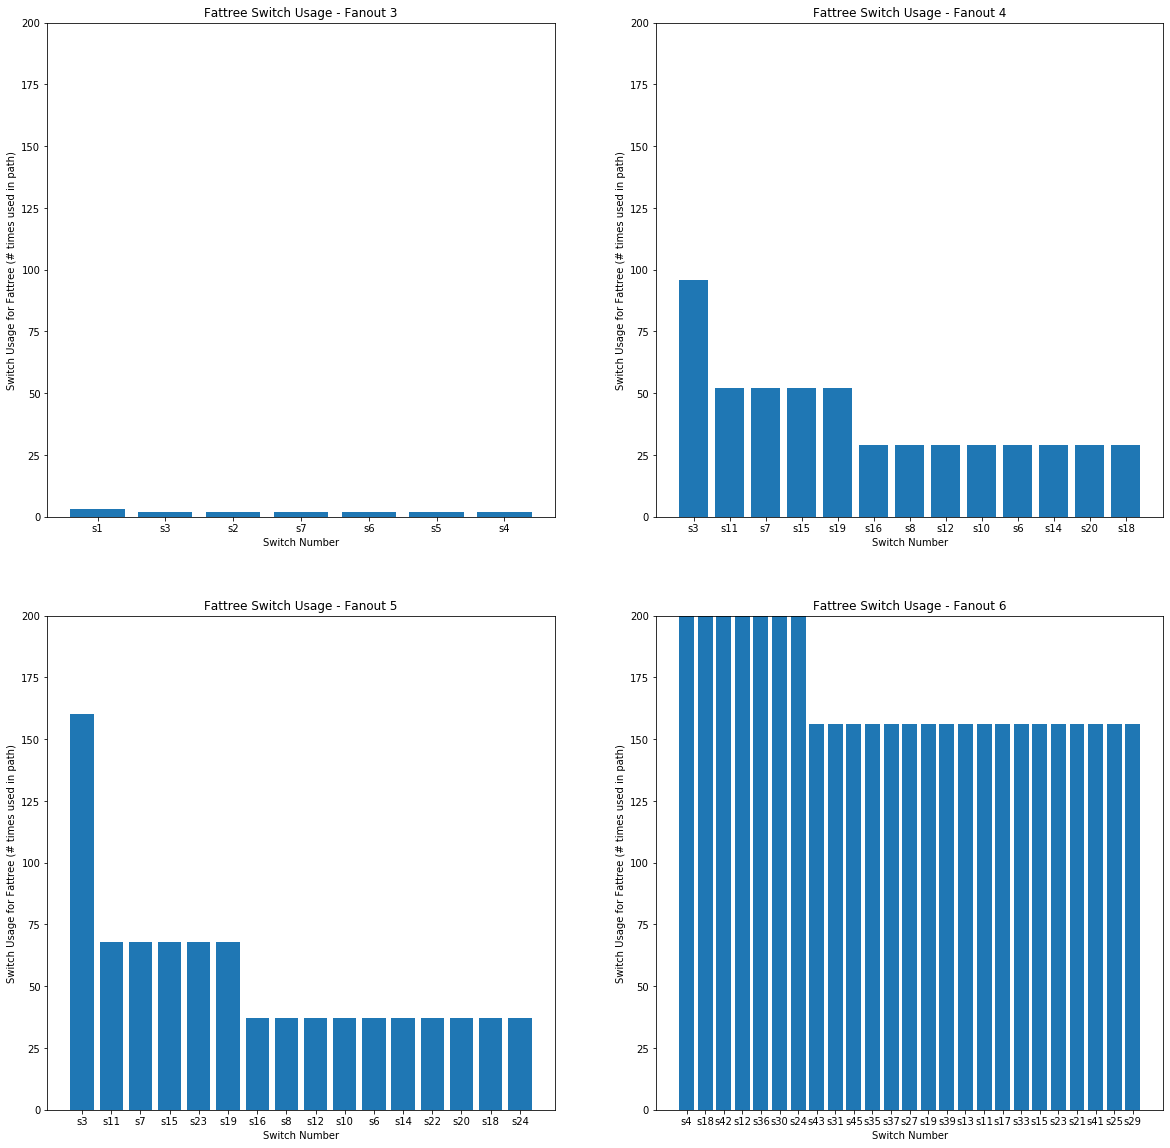

In [57]:
# Plotting average bandwidth for fattree topologies with fanouts of 2, 3, 4, and 5 
import os, os.path
%matplotlib inline
import matplotlib.pyplot as plt


DIR = '../fattree-logs/pathDiversity/'
fanouts = [3, 4, 5, 6]
fanout_list = ["fanout-3.txt", "fanout-4.txt", "fanout-5.txt", "fanout-6.txt"]

all_fanouts_switches = []
all_fanouts_uses = []
BW = 0.0
fanout_avg_BW = []

for fanout in fanout_list:
    with open(DIR + fanout) as file:
        lines = file.readlines()
        count = 0
        switches = []
        switch_uses = []
        for line in lines:
            line_split = line.split(" ")
            switch = line_split[0]
            num_uses = line_split[1].rstrip("\n")
            switches.append(switch)
            switch_uses.append(int(num_uses))
            
        all_fanouts_switches.append(switches)
        all_fanouts_uses.append(switch_uses)
                               
fig, axs = plt.subplots(2, 2, figsize=(20,20))

for index in range(0, len(fanouts)):
    axs[int(index/2), index%2].bar(all_fanouts_switches[index], all_fanouts_uses[index])
    axs[int(index/2), index%2].set_title('Fattree Switch Usage - Fanout ' + str(index + 3))

counter = 0
for ax in axs.flat:
    ax.set(xlabel='Switch Number', ylabel='Switch Usage for Fattree (# times used in path)')
    ax.set_ylim((0,  200))

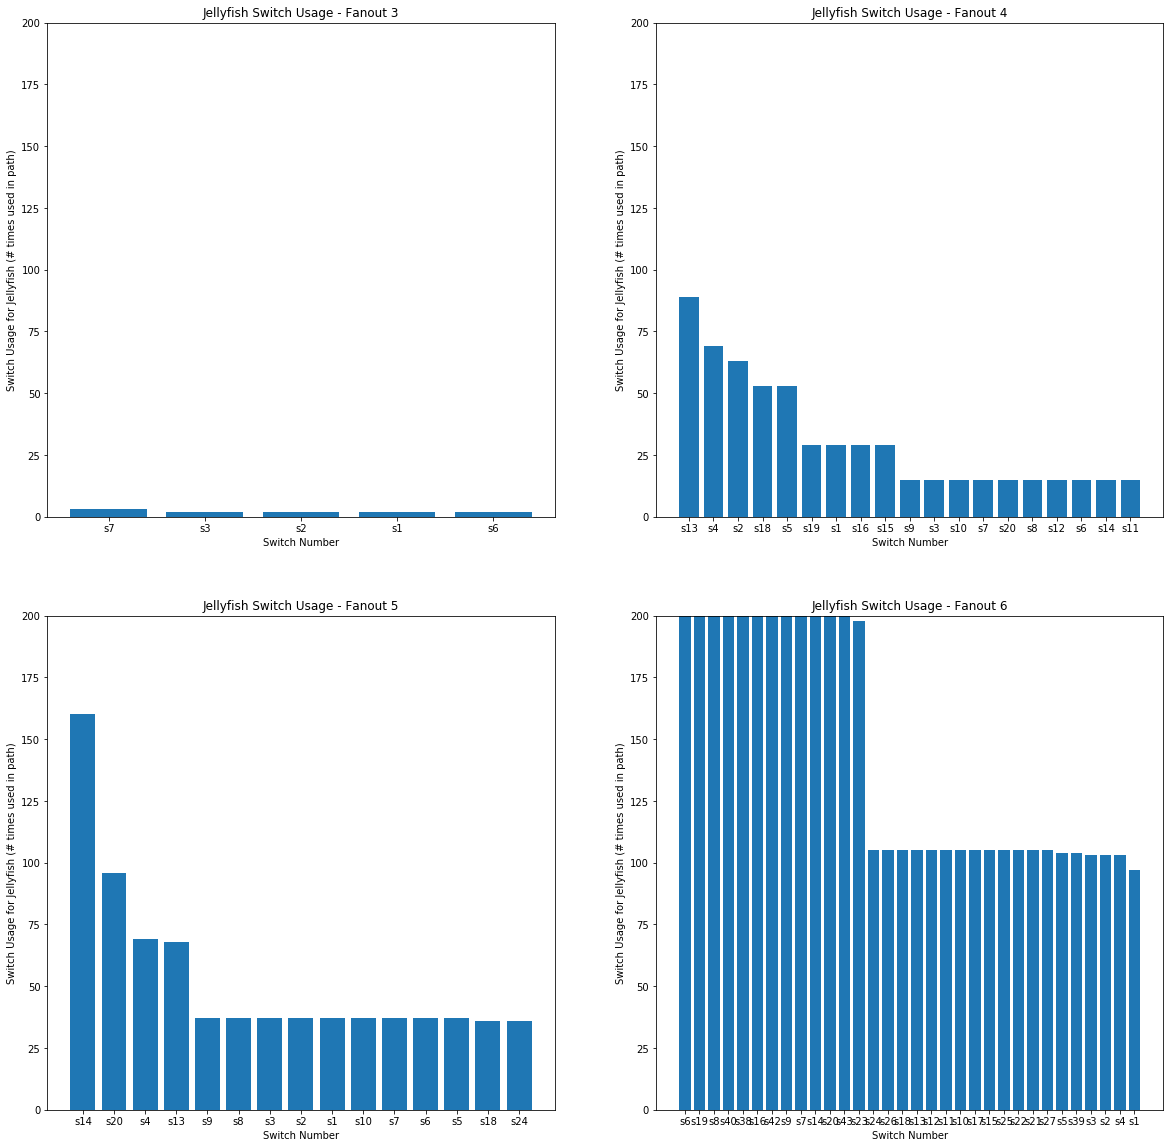

In [58]:
# Plotting average bandwidth for fattree topologies with fanouts of 2, 3, 4, and 5 
import os, os.path
%matplotlib inline
import matplotlib.pyplot as plt


DIR = '../jellyfish-logs/pathDiversity/'
fanouts = [3, 4, 5, 6]
fanout_list = ["fanout-3.txt", "fanout-4.txt", "fanout-5.txt", "fanout-6.txt"]

all_fanouts_switches = []
all_fanouts_uses = []
BW = 0.0
fanout_avg_BW = []

for fanout in fanout_list:
    with open(DIR + fanout) as file:
        lines = file.readlines()
        count = 0
        switches = []
        switch_uses = []
        for line in lines:
            line_split = line.split(" ")
            switch = line_split[0]
            num_uses = line_split[1].rstrip("\n")
            switches.append(switch)
            switch_uses.append(int(num_uses))
            
        all_fanouts_switches.append(switches)
        all_fanouts_uses.append(switch_uses)
                               
fig, axs = plt.subplots(2, 2, figsize=(20,20))

for index in range(0, len(fanouts)):
    axs[int(index/2), index%2].bar(all_fanouts_switches[index], all_fanouts_uses[index])
    axs[int(index/2), index%2].set_title('Jellyfish Switch Usage - Fanout ' + str(index + 3))

counter = 0
for ax in axs.flat:
    ax.set(xlabel='Switch Number', ylabel='Switch Usage for Jellyfish (# times used in path)')
    ax.set_ylim((0, 200))